## Langkah:

    - Import library.
    - Load dataset.
    - Bangun model.
    - Kompilasi dan latih model.
    - Evaluasi hasil.




## Klasifikasi Data Iris


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Bangun model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Kompilasi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train, y_train, epochs=50, batch_size=8)

# Evaluasi
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi: {acc}")



Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3726 - loss: 2.7569
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3795 - loss: 1.8833 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4351 - loss: 1.2777 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4196 - loss: 1.1828 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4627 - loss: 1.0807 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4878 - loss: 1.0446 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4902 - loss: 1.0131 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7880 - loss: 0.9718 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6677 - loss: 0.9546 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6560 - loss: 0.9393 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6257 - loss: 0.9213 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6933 - los

## Tugas 2

    - Ubah jumlah neuron hidden layer.
    - Bandingkan akurasi dengan konfigurasi awal.



In [2]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Persiapan Data (Sama untuk kedua model agar adil)
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data (Gunakan random_state agar pembagian data konsisten)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================================
# MODEL 1: Konfigurasi Awal (10 & 8 Neuron)
# ==========================================
print("--- Training Model Awal ---")
model_awal = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_awal.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_awal = model_awal.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0) # verbose=0 agar tidak terlalu panjang
loss_awal, acc_awal = model_awal.evaluate(X_test, y_test, verbose=0)

# ==========================================
# MODEL 2: Modifikasi Neuron (64 & 32 Neuron)
# ==========================================
print("\n--- Training Model Modifikasi ---")
model_mod = tf.keras.Sequential([
    # Ubah jumlah neuron hidden layer di sini
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_mod.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_mod = model_mod.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)
loss_mod, acc_mod = model_mod.evaluate(X_test, y_test, verbose=0)

# ==========================================
# HASIL PERBANDINGAN
# ==========================================
print("\n" + "="*40)
print("PERBANDINGAN AKURASI")
print("="*40)
results = pd.DataFrame({
    'Model': ['Model Awal (10, 8 neuron)', 'Model Modifikasi (64, 32 neuron)'],
    'Akurasi': [acc_awal, acc_mod],
    'Loss': [loss_awal, loss_mod]
})

print(results)

--- Training Model Awal ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Training Model Modifikasi ---

PERBANDINGAN AKURASI
                              Model   Akurasi      Loss
0         Model Awal (10, 8 neuron)  0.966667  0.267678
1  Model Modifikasi (64, 32 neuron)  0.966667  0.093963



## Kesimpulan:

Penambahan neuron memang memperbesar kapasitas jaringan, namun pada dataset kecil seperti Iris, dampaknya biasanya tidak signifikan.




## Tugas 3

    - Bandingkan Sigmoid vs ReLU pada dataset Iris.
    - Catat perbedaan loss dan akurasi.

--- Training Model Sigmoid ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--- Training Model ReLU ---

HASIL PERBANDINGAN
  Activation  Accuracy      Loss
0    Sigmoid  0.933333  0.290380
1       ReLU  1.000000  0.047448


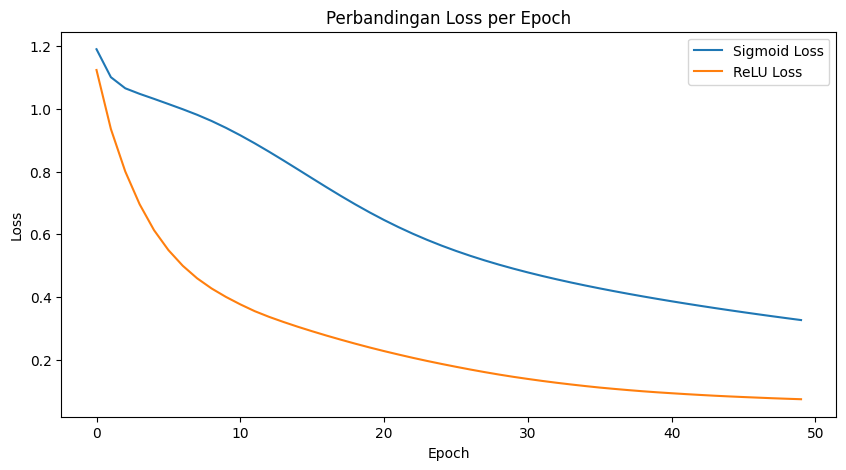

In [3]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Agar hasil bisa direproduksi
tf.random.set_seed(42)
np.random.seed(42)

# 1. Load & Preprocess Data
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding label
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (Opsional tapi disarankan) Scaling data membantu konvergensi, terutama untuk Sigmoid
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fungsi pembangun model agar arsitektur konsisten
def build_model(activation_fn, name):
    model = tf.keras.Sequential([
        # Hidden Layer 1
        tf.keras.layers.Dense(64, activation=activation_fn, input_shape=(4,), name='hidden1'),
        # Hidden Layer 2
        tf.keras.layers.Dense(32, activation=activation_fn, name='hidden2'),
        # Output Layer (Tetap Softmax untuk klasifikasi multi-kelas)
        tf.keras.layers.Dense(3, activation='softmax', name='output')
    ], name=name)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 2. Training Model SIGMOID
print("--- Training Model Sigmoid ---")
model_sigmoid = build_model('sigmoid', 'Model_Sigmoid')
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
loss_sigmoid, acc_sigmoid = model_sigmoid.evaluate(X_test, y_test, verbose=0)

# 3. Training Model RELU
print("--- Training Model ReLU ---")
model_relu = build_model('relu', 'Model_ReLU')
history_relu = model_relu.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
loss_relu, acc_relu = model_relu.evaluate(X_test, y_test, verbose=0)

# 4. Tabulasi Hasil
print("\n" + "="*40)
print("HASIL PERBANDINGAN")
print("="*40)
results = pd.DataFrame({
    'Activation': ['Sigmoid', 'ReLU'],
    'Accuracy': [acc_sigmoid, acc_relu],
    'Loss': [loss_sigmoid, loss_relu]
})
print(results)

# 5. Visualisasi Loss (Opsional)
plt.figure(figsize=(10, 5))
plt.plot(history_sigmoid.history['loss'], label='Sigmoid Loss')
plt.plot(history_relu.history['loss'], label='ReLU Loss')
plt.title('Perbandingan Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Kesimpulan

    - ReLU cenderung mencapai konvergensi dengan lebih cepat.
    - Penggunaan ReLU membantu mengurangi masalah vanishing gradient.
    - Aktivasi sigmoid rentan masuk ke kondisi saturasi pada nilai yang sangat besar atau sangat kecil.
    - Untuk tugas klasifikasi, ReLU umumnya memberikan hasil yang lebih kuat.